# Análise de Cluster para agrupamento de países com base em indicadores socioeconômicos com KMeans. 

# Introdução 

No mundo em que vivemos, há aproximamente 200 países, em que alguns são similares entre si e diferentes dos demais. Há alguns países, os chamados países desenvolvidos, que possuem alta renda per capita, alto nível de escolarização,possuem industrias avançadas, enquanto que há países que possuem baixa renda, a economia predominantemente agropecuária, baixo nível de alfabetização. Neste projeto, será estudada a relação entre as variáveis socioeconômicas, em que seguida será aplicada o algoritmo KMeans para agrupar os países com base nessas variáveis. 


In [54]:
import pandas              as pd
import seaborn             as sns
import matplotlib.pyplot   as plt
import plotly.express      as px
from   sklearn.cluster     import KMeans
from sklearn.metrics       import silhouette_score

## Conhecendo o conjunto de dados

O conjunto de dados utilizado será o conjunto "countries of the world.csv", disponibilizado na plataforma Kaggle. Inicialmente, pode-se visualizar as 6 primeiras linhas do conjunto de dados.

In [55]:
dados=pd.read_csv("countries of the world.csv")
dados.head(6)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"


Após visualizar as 6 primeiras linhas, nota-se a presença de alguns valores faltantes. Por fim, pode-se verificar a quantidade de linhas e colunas do conjunto de dados.

In [56]:
dados.shape

(227, 20)

É possivel verificar que o conjunto de dados é composto por 227 observações(países) e 19 colunas. As colunas do dataset são:

**Country** = País

**Region** = Região

**Population** = População do país

**Area (sq. mi.)** = Área (M^2)

**Pop. Density (per sq. mi.)** = Densidade Populacional (Em M^2)

**Net migration** = Migração liquida (Diferença entre o número de imigrantes qualificados e emigrantes qualificados)

**Infant mortality (per 1000 births)** = Mortalidade infantil (Por 1000 nascimentos)

**GDP (per capita)** = PIB per capita

**Literacy (%)** = Alfabetização (%)

**Phones (per 1000)** = Quantidade de Celulas por 1000 pessoas

**Arable (%)** = Arável

**Crops (%)** = Percentual de área plantada

**Others (%)** = Outros

**Climate** = Clima 

**Birthrate** = Taxa de nascimento

**Deathrate** = Taxa de mortalidade 

**Agriculture** = Nível da industria de agricultura do país

**Industry** = Nível da industria de indústria do país

**Service** = Nível da industria de Serviço do país


# Pré Processamento

Após conhecer o conjunto de dados, pode-se então realizar o pré processamento dos dados. Como há o interesse no agrupamento de países, não há o interesse na variável "region", logo é possível exclui-la do conjunto de dados. 

In [57]:
dados.drop('Region',axis=1,inplace=True)

Então, como segunda etapa pode-se verificar se os dados estão no formato correto. 

In [58]:
dados.dtypes

Country                                object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

Verifica-se que a maioria das variáveis quantitativas estão no formato objeto, logo deve-se transformá-las em formato numérico. 

In [59]:
dados.replace(',','.',regex=True,inplace=True)

colunasobjetos=dados.select_dtypes(include='object').columns
colunasobjetos=colunasobjetos.drop(["Country"])
for i in colunasobjetos: 
     dados[i]=pd.to_numeric(dados[i])

In [60]:
dados.dtypes

Country                                object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Após transformar as variáveis no formato correto, deve-se analisar a quantidade de valores nulos por variável. Verificando, de forma decrescente do percentual de valores nulos por variável, tem-se:


In [61]:
dados.isnull().sum().sort_values(ascending=False)/len(dados)*100

Climate                               9.691630
Literacy (%)                          7.929515
Industry                              7.048458
Service                               6.607930
Agriculture                           6.607930
Phones (per 1000)                     1.762115
Deathrate                             1.762115
Birthrate                             1.321586
Infant mortality (per 1000 births)    1.321586
Net migration                         1.321586
Other (%)                             0.881057
Crops (%)                             0.881057
Arable (%)                            0.881057
GDP ($ per capita)                    0.440529
Coastline (coast/area ratio)          0.000000
Pop. Density (per sq. mi.)            0.000000
Area (sq. mi.)                        0.000000
Population                            0.000000
Country                               0.000000
dtype: float64

Tem-se que as variável Climate, Literacy(%), Industry, Service, Agriculture são as variáveis com maior percentual de valores nulos, com percentual variando entre 6.6% a 9.69%. Além disso, nota-se uma pequena presença de valores nulos nas variáveis Phones (per 1000), Deathrate, Birthrate, Infant mortality (per 1000 births) e Net migration. Como forma de tratamento dos valores nulos, é possível verificar as medidas das variáveis quantativas para verificar uma forma de tratar os dados nulos.

In [62]:
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


Da tabela de estatisticas sumárias, verifica-se que para as variáveis Climate e Service a média está próxima a mediana. Enquanto que para as variáveis Literacy (%), Industry e Agriculture há uma grande diferença entre média e mediana. Logo, uma estratégia a ser utilizada para lidar com dados faltantes é substituir o valor nulo pela média para as demais nas variáveis Climate e Service, enquanto que para as demais substitui-se o valor nulo pela mediana. 

In [63]:
dados["Climate"].fillna(dados["Climate"].mean(),inplace=True)

dados["Service"].fillna(dados["Service"].mean(),inplace=True)

listavarvalornulo= ["Literacy (%)",
                    "Industry",
                    "Agriculture",
                    "Infant mortality (per 1000 births)",
                    "GDP ($ per capita)",
                    "Phones (per 1000)",
                    "Net migration",
                    "Literacy (%)",
                    "Phones (per 1000)",
                    "Arable (%)",
                    "Crops (%)",
                    "Other (%)",
                    "Birthrate",
                    "Deathrate",
                    "Agriculture",
                    "Industry"]

for i in listavarvalornulo: 
    dados[i].fillna(dados[i].median(),inplace=True)

# Análise Exploratória

Após o pré processamento dos dados, pode-se realizar uma breve análise exploratória do conjunto de dados. 

In [64]:
dadosdeinteresse=dados

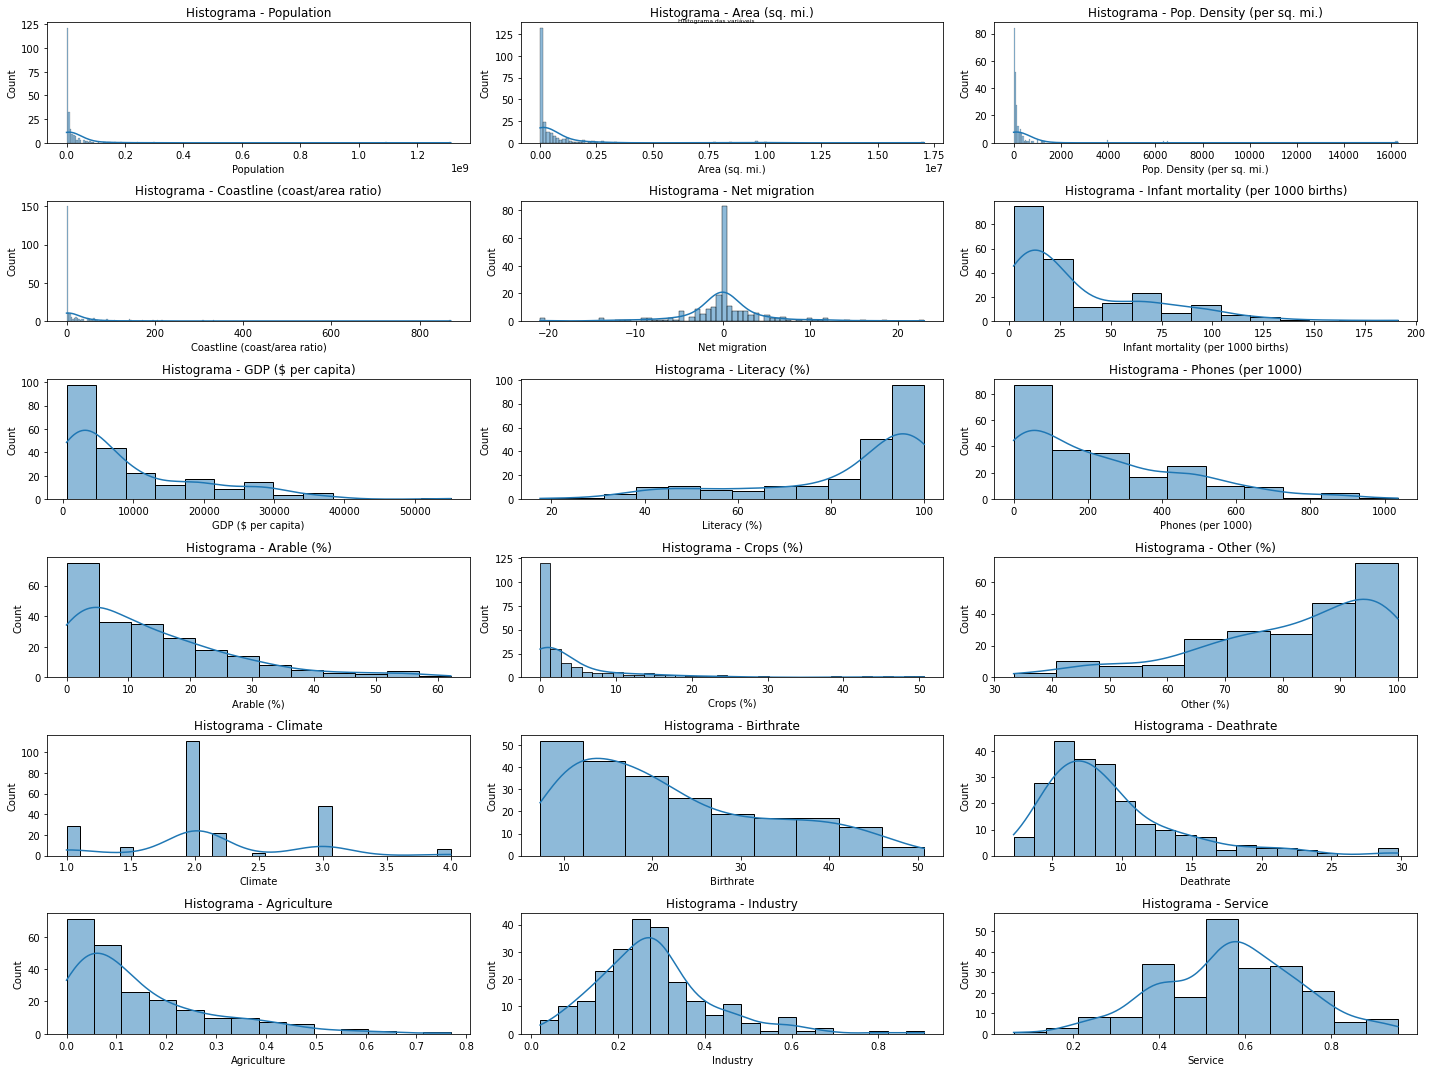

In [28]:
dadosdeinteresse.shape
fig,ax=plt.subplots(6,3,figsize=(20,15))
ax=ax.flatten()
plt.suptitle('Histograma das variáveis',fontsize=6)
for i, dado in enumerate(dadosdeinteresse.drop("Country",axis=1).columns):
    sns.histplot(dadosdeinteresse[dado],ax=ax[i],kde=True)
    ax[i].set_title(f"Histograma - {dado}")

plt.tight_layout()
plt.show()

Dos histogramas, verifica-se que a população dos países se concentram no intervalo de até 0.2 * 10^9, porém há presença de país com população de mais de 1.2 * 10^9. A mortalidade infantil se concentra entre 0 a 25 mortes por 1000 nascimentos, grande parte deles possuem taxa de alfabetização por volta de 90%, há observações que quase todas as pessoas possuem telefone, e países que possuem mais de 80% do PIB vindo da agricultura. Além disso, nota-se uma grande discrepância entre os países em relação ao PIB per capita, com alguns possuindo PIB per capita próximo a 0 e outros próximos a 5000. 

Após a construção dos histogramas, há o interesse em estudar a relação entre as variáveis quantitativas. O estudo entre as variáveis pode ser feito através da matriz de correlação. O coeficiente de correlação varia entre -1(variáveis fortemente relacionadas negativamente) e 1(variáveis fortemente relacionadas negativamente), porém sendo importante frisar que não há uma relação de causa e efeito na correlação. Tem-se então a seguinte matriz de correlação: 

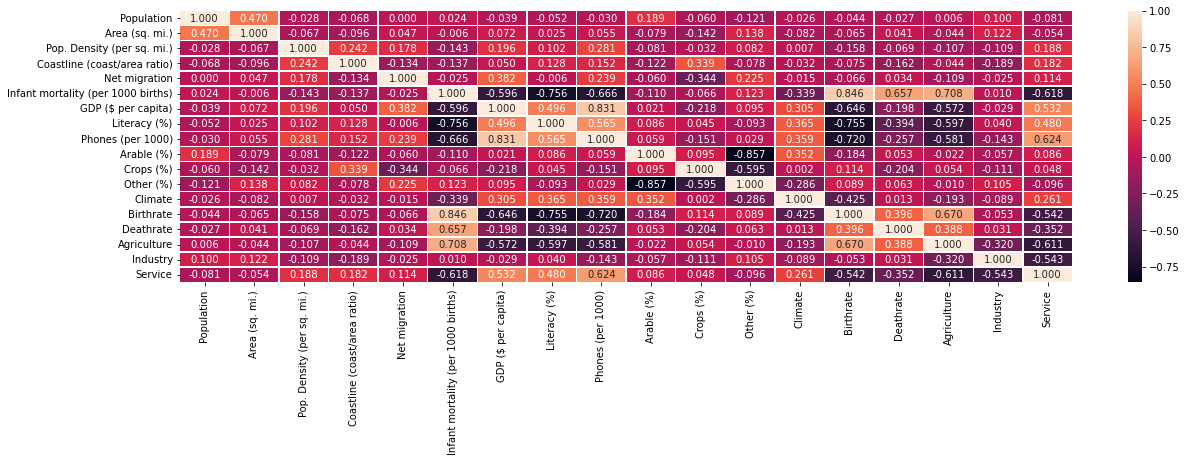

In [65]:
correlacao=dadosdeinteresse.corr()
plt.figure(figsize=(20,5))
sns.heatmap(correlacao, annot = True,fmt=".3f", linewidths=.6)


Da matriz de correlação observa-se que:

     - O nível de agricultura está fortemente relacionado com a mortalidade infantil e taxa de nascimento do país estão 
    fortemente relacionados. Enquanto que serviço e mortalidade infantil estão relacionados de forma moderada de forma
    inversa.
     - A taxa de mortalidade infantil está fortemente relacionada com taxa de nascimento.
     - A taxa de nascimento está fortemente relacionada de maneira inversa com a taxa de alfabetização e número de telefones por 1000 habitantes.
     - A mortalidade infantil está relacionada de forma moderada com taxa de mortalidade.

# Construção do modelo

Conhecendo os dados e a relação entre as variáveis, deve-se então construir o modelo de KMeans. Nesse modelo não supervisionado, deve-se primeiro encontrar o valor de K que minimmize a média da inércia(proximidade entre os pontos em relação aos centróides do cluster). É interessa comentar que como o KMeans leva-se em consideração a distância média entre os pontos, tem-se que padronizar os dados, para que as variáveis possuem média 0 e variância 1. Visualiza-se então a média da inércia por valor k de cluster através do seguinte gráfico: 

In [66]:
dadosdeinteressecopia=dadosdeinteresse.copy()
dadosdeinteressecopia=dadosdeinteressecopia.set_index('Country')
dadosdeinteressecopia=(dadosdeinteressecopia-dadosdeinteresse.mean())/dadosdeinteressecopia.std()

In [67]:
k = []
valorinercia= []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(dadosdeinteressecopia)
    k.append(i)
    valorinercia.append(kmeans.inertia_)

C:\Users\j2184\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'Valor da Inércia pelo K Clusters - Método do Cotovelo')

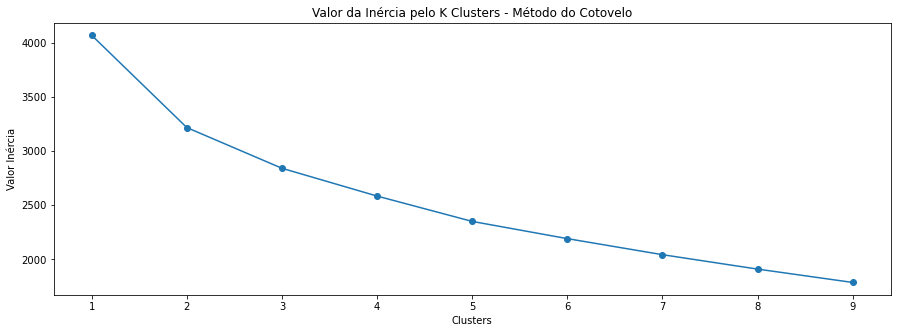

In [68]:
plt.figure(figsize=(15,5))
plt.plot(k,valorinercia,marker='o')
plt.xlabel("Clusters")
plt.ylabel("Valor Inércia")
plt.title("Valor da Inércia pelo K Clusters - Método do Cotovelo")

Pelo método do cotovelo, deve-se escolher o valor K quando o valor da inércia não se altera de forma significativa ao alterar o valor de K. Analisando o gráfico, verifica-se que o melhor valor de K é 4 ou 5, pois não se altera o valor de K de forma significativa. Com essa dúvida, pode-se obter outra métrica para indentificar se deve-se utilizar 4 ou 5 clusters, a métrica escolhida é o método da silhueta, que leva em consideração a distâ intra ou inter clusters, em que valores maiores são melhores.

In [69]:
for i in [4,5]:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(dadosdeinteressecopia)
    silhouette_avg = silhouette_score(dadosdeinteressecopia, kmeans.labels_)
    print(i,"Clusters tem",silhouette_avg,"de coeficiente silhueta")

4 Clusters tem 0.17482430845952168 de coeficiente silhueta
5 Clusters tem 0.17689849803131594 de coeficiente silhueta


Observa-se que o valor do coeficiente de silhueta do cluster 4 e cluster 5 é relativamente próximo, não havendo grandes diferenças entre eles. Logo, por motivo de simplicidade, o valor K de cluster que será escolhido é 4. Ajustamos então um modelo de KMeans para os dados padronizados com 4 clusters. E obtemos o cluster por observação.

In [70]:
kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans.fit(dadosdeinteressecopia)

KMeans(n_clusters=4)

In [71]:
dadosdeinteressecopia["Cluster"]=kmeans.labels_
dadosdeinteresse["Cluster"]=kmeans.labels_

dadosdeinteresse

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380000,3
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579000,2
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298000,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.565283,2
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.565283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,2460492,5860,419.9,0.00,2.98,19.62,800.0,92.5,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630000,2
223,Western Sahara,273008,266000,1.0,0.42,0.00,21.00,5550.0,92.5,176.2,0.02,0.00,99.98,1.0,18.79,7.84,0.099,0.272,0.400000,0
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393000,0
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489000,3


Com o cluster por país, realiza-se então a média das variáveis quantitativas por cluster.

In [72]:
dadosdeinteresse.groupby("Cluster").mean()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Cluster,,,,,,,,,,,,,,,,,,
0,3.994222e+07,1.030944e+06,85.658571,9.709714,-0.234143,34.068571,6383.571429,84.390000,143.897143,6.062000,1.876286,92.019429,1.736516,23.209286,7.182429,0.120329,0.356686,0.512853
1,1.539917e+07,5.027115e+05,980.643750,38.262656,2.493594,7.084219,22265.625000,96.681250,528.382813,13.723750,2.132187,84.099687,2.492645,12.295000,7.964375,0.046641,0.229469,0.717859
2,3.574871e+07,1.584597e+05,285.759184,33.911020,-3.014694,23.560612,5357.142857,89.757143,183.548980,25.613673,13.296531,61.089796,2.470533,18.823061,7.910816,0.133449,0.284327,0.579624
3,2.251944e+07,5.384858e+05,74.640909,0.327273,0.296818,91.452273,1388.636364,56.481818,10.529545,12.896818,2.492727,84.610909,1.895843,38.095682,15.728636,0.352659,0.236773,0.410795


Com os dados das médias das variáveis quantitativas por cluster, tem-se as seguintes características de cada um deles:

**Cluster 0**: 

- Densidade populacional muito alta
- Maior renda per capita
- Alto nível de alfabetização
- Alta quantidade de celulares para cada 1000 habitantes
- O valor de clima mais alto
- Alto percentual de serviço no PIB

**Cluster 1**:

- Segunda menor densidade populacional
- Alta taxa de mortalidade infantil 
- Menor nível de alfabetização
- Menor quantidade de telefone por 1000 habitantes
- Alto nível de nascimento e mortalidade 
- Alto percentual de agricultura e serviço no PIB

**Cluster 2**:

- Segunda maior densidade populacional
- Grande presença de litoral
- Imigração liquida negativa
- Segundo menor PIB per capita
- Segunda maior taxa de alfabetização e de número de celular por 1000 habitantes
- Segunda menor de nascimento
- Alto percentual de participação de serviço no PIB

**Cluster 3**:

- Segunda maior renda per capita
- Forte presença da indústria e serviço no PIB
- A Menor taxa de mortalidade
- Segunda menor taxa de alfabetização e de número de celular por 1000 habitantes
- A menor taxa de área cúltivavel

Tendo em vista as características por cluster, é possuir o mapa dos países para verificar quais são os países que estão os clusters.

In [79]:
fig=px.choropleth(dadosdeinteresse,
                        locationmode='country names',
                        locations='Country',
                        color='Cluster',
                        title="Cluster por país"
                       )
fig.show()

Dos mapas, pode-se verificar que o cluster 0 se concentra nos países desenvolvidos, tais como, Estados Unidos, Canadá, França, Inglaterra, nota-se também que o Uruguai é o único país que está nesse cluster. No cluster 1, nota-se forte presença dos países africano, além de Afeganistão, Paquistão, são os chamados subdesenvolvidos. No cluster 3, nota-se a presença dos países emergentes, tais como, América do Sul, Rússia, China. Enquanto que no cluster 2, observa-se países como India, Ucrânia, Turquia, e Tailândia. 

Tem-se o seguinte conjunto de países para o cluster 0:

In [21]:
dadosdeinteresse[dadosdeinteresse["Cluster"]==0]["Country"].unique()

array(['Albania ', 'American Samoa ', 'Armenia ', 'Bangladesh ',
       'Bulgaria ', 'Cape Verde ', 'Comoros ', 'Cook Islands ', 'Cuba ',
       'Czech Republic ', 'Dominica ', 'Dominican Republic ',
       'El Salvador ', 'Fiji ', 'Gaza Strip ', 'Georgia ', 'Grenada ',
       'Hungary ', 'India ', 'Jamaica ', 'Kiribati ', 'Korea. North ',
       'Lebanon ', 'Lithuania ', 'Macedonia ', 'Maldives ',
       'Marshall Islands ', 'Mauritius ', 'Micronesia. Fed. St. ',
       'Moldova ', 'Philippines ', 'Poland ', 'Romania ', 'Saint Lucia ',
       'Saint Vincent and the Grenadines ', 'Samoa ',
       'Sao Tome & Principe ', 'Serbia ', 'Seychelles ', 'Sri Lanka ',
       'Thailand ', 'Tonga ', 'Tunisia ', 'Turkey ', 'Ukraine ',
       'Wallis and Futuna ', 'West Bank '], dtype=object)

Para o cluster 1:

In [22]:
dadosdeinteresse[dadosdeinteresse["Cluster"]==1]["Country"].unique()

array(['Afghanistan ', 'Angola ', 'Benin ', 'Bhutan ', 'Burkina Faso ',
       'Burma ', 'Burundi ', 'Cambodia ', 'Cameroon ',
       'Central African Rep. ', 'Chad ', 'Congo. Dem. Rep. ',
       "Cote d'Ivoire ", 'Djibouti ', 'Ethiopia ', 'Gambia. The ',
       'Ghana ', 'Guinea ', 'Guinea-Bissau ', 'Haiti ', 'Kenya ', 'Laos ',
       'Lesotho ', 'Liberia ', 'Madagascar ', 'Malawi ', 'Mali ',
       'Mauritania ', 'Mozambique ', 'Nepal ', 'Niger ', 'Nigeria ',
       'Pakistan ', 'Rwanda ', 'Senegal ', 'Sierra Leone ', 'Somalia ',
       'Sudan ', 'Swaziland ', 'Tanzania ', 'Togo ', 'Uganda ',
       'Vanuatu ', 'Zambia ', 'Zimbabwe '], dtype=object)

Para o cluster 2:

In [23]:
dadosdeinteresse[dadosdeinteresse["Cluster"]==2]["Country"].unique()

array(['Algeria ', 'Argentina ', 'Azerbaijan ', 'Bahrain ', 'Belize ',
       'Bolivia ', 'Botswana ', 'Brazil ', 'Brunei ', 'Chile ', 'China ',
       'Colombia ', 'Congo. Repub. of the ', 'Costa Rica ', 'East Timor ',
       'Ecuador ', 'Egypt ', 'Equatorial Guinea ', 'Eritrea ', 'Gabon ',
       'Greenland ', 'Guatemala ', 'Guyana ', 'Honduras ', 'Indonesia ',
       'Iran ', 'Iraq ', 'Jordan ', 'Kazakhstan ', 'Kuwait ',
       'Kyrgyzstan ', 'Libya ', 'Malaysia ', 'Mayotte ', 'Mexico ',
       'Mongolia ', 'Montserrat ', 'Morocco ', 'Namibia ', 'Nauru ',
       'Nicaragua ', 'Oman ', 'Panama ', 'Papua New Guinea ', 'Paraguay ',
       'Peru ', 'Puerto Rico ', 'Qatar ', 'Russia ', 'Saint Helena ',
       'Saudi Arabia ', 'Solomon Islands ', 'South Africa ', 'Suriname ',
       'Syria ', 'Tajikistan ', 'Trinidad & Tobago ', 'Turkmenistan ',
       'Turks & Caicos Is ', 'Tuvalu ', 'United Arab Emirates ',
       'Uzbekistan ', 'Venezuela ', 'Vietnam ', 'Western Sahara ',
       'Yemen

Para o cluster 3:

In [25]:
dadosdeinteresse[dadosdeinteresse["Cluster"]==3]["Country"].unique()

array(['Andorra ', 'Anguilla ', 'Antigua & Barbuda ', 'Aruba ',
       'Australia ', 'Austria ', 'Bahamas. The ', 'Barbados ', 'Belarus ',
       'Belgium ', 'Bermuda ', 'Bosnia & Herzegovina ',
       'British Virgin Is. ', 'Canada ', 'Cayman Islands ', 'Croatia ',
       'Cyprus ', 'Denmark ', 'Estonia ', 'Faroe Islands ', 'Finland ',
       'France ', 'French Guiana ', 'French Polynesia ', 'Germany ',
       'Gibraltar ', 'Greece ', 'Guadeloupe ', 'Guam ', 'Guernsey ',
       'Hong Kong ', 'Iceland ', 'Ireland ', 'Isle of Man ', 'Israel ',
       'Italy ', 'Japan ', 'Jersey ', 'Korea. South ', 'Latvia ',
       'Liechtenstein ', 'Luxembourg ', 'Macau ', 'Malta ', 'Martinique ',
       'Monaco ', 'Netherlands ', 'Netherlands Antilles ',
       'New Caledonia ', 'New Zealand ', 'N. Mariana Islands ', 'Norway ',
       'Palau ', 'Portugal ', 'Reunion ', 'Saint Kitts & Nevis ',
       'St Pierre & Miquelon ', 'San Marino ', 'Singapore ', 'Slovakia ',
       'Slovenia ', 'Spain ', 'Swede

# Conclusão 

Neste projeto, foi construida uma breve análise exploratória sobre o conjunto de dados, indentificamos a relação entre as variáveis. Nesta etapa, observamos um grande discrepância entre os países em relação a variáveis econômicas e sociais, tais como, PIB per capita, taxa de alfabetização, mortalidade infantil, etc. 

Por fim, com o modelo kMeans foi obtido que pode-se dividir os países em 4 grupos distintos e semelhantes entre si. Observamos que há países que possuem alto PIC, alta taxa de alfabetização, enquanto há países subdesenvolvidos. Como próxima etapa dessa análise, pode-se, por exemplo, concentrar ajuda humanitária e econômica nos países do cluster 1, que possuem baixo nível de alfabetização, alta mortalidade, baixo PIB per capita.